In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import pandas as pd

from scipy.stats import multivariate_normal
#np.random.seed(0)

In [2]:
mu=[-8,4]
Sigma=np.array([[4,2],[2,4]])
Gauss= multivariate_normal(mean=mu,cov=Sigma)

n_samples = 400
samples=Gauss.rvs(n_samples)


Text(0.5, 1.0, 'Dataset')

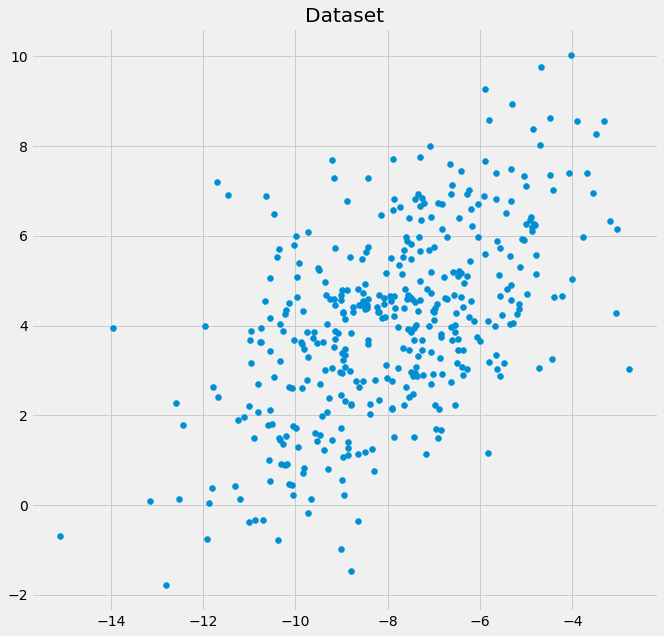

In [3]:
fig = plt.figure(figsize=(10,10))
ax = ax = plt.axes()
ax.scatter(samples[:,0],samples[:,1])
ax.set_title('Dataset')

In [4]:
multi_normal = multivariate_normal(mean=mu,cov=Sigma)

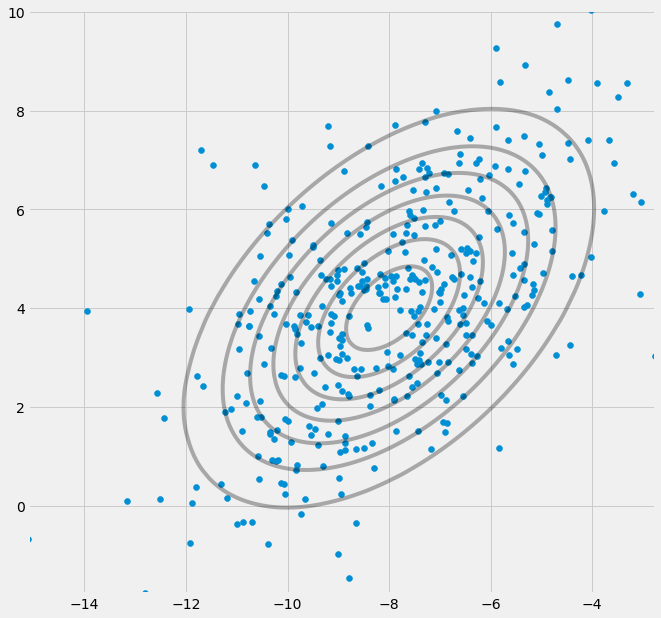

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.scatter(samples[:,0],samples[:,1])

x,y = np.meshgrid(np.sort(samples[:,0]),np.sort(samples[:,1]))
xy_2D = np.array([x.flatten(),y.flatten()]).T

Z_grid=multi_normal.pdf(xy_2D).reshape(n_samples,n_samples)

ax.contour(x,y,Z_grid,colors='black',alpha=0.3)


In [6]:
print(x.shape,y.shape,xy_2D.shape,Z_grid.shape)

(400, 400) (400, 400) (160000, 2) (400, 400)


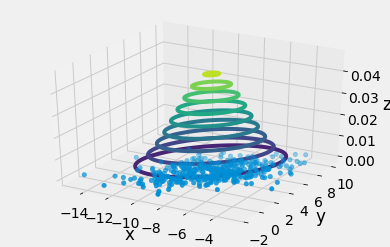

In [7]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(samples[:,0],samples[:,1])

ax.contour3D(x,y,Z_grid,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



In [8]:

x = np.linspace(-16, 1, 30)
y = np.linspace(-3, 12, 50)

X, Y = np.meshgrid(x, y)

xy_2D = np.array([X.flatten(),Y.flatten()]).T
Z_grid=multi_normal.pdf(xy_2D).reshape(X.shape)

print(x.shape,y.shape,X.shape,Y.shape,xy_2D.shape,Z_grid.shape)

(30,) (50,) (50, 30) (50, 30) (1500, 2) (50, 30)


In [9]:
# Read data from a csv
fig = go.Figure(data=[go.Surface(contours = {
        "z": {"show": True, "color":"white", "start": 0.001, "end": 0.04, "size": 0.005},
    },x=x, y=y, z=Z_grid)])
fig.update_layout(title='Surface plot of Normal distribution', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [10]:
samples.shape

(400, 2)

In [11]:
layout = go.Layout(width = 700, height =700, title_text='Normal distribution')

fig = go.Figure(data=[go.Surface(contours = {
        "z": {"show": True, "color":"white", "start": 0.001, "end": 0.04, "size": 0.005},
    },x=x, y=y, z=Z_grid, opacity=0.5)],layout=layout)


fig.add_scatter3d(x=samples[:,0], y=samples[:,1], z = 0.001*np.ones(len(samples[:,0])), mode='markers', 
                  marker=dict(size=4, color=1,               
                              colorscale='Reds'))


fig.show()
